In [ ]:
import requests
import pandas as pd

# URL do arquivo JSON
url = "https://raw.githubusercontent.com/jlima2020/challenge2-data-science/main/TelecomX_Data.json"

# Fazendo a requisição
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()

    # Convertendo JSON para DataFrame
    df = pd.DataFrame(data)

    # Visualizando as primeiras linhas
    print(df.head())

else:
    print(f"Erro ao acessar os dados: {response.status_code}")



   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
# Verificar as primeiras linhas do dataset
print(df.head())

# Exibir informações sobre as colunas e tipos de dados
print(df.info())

# Verificar os tipos de dados de cada coluna
print(df.dtypes)


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
import requests
import pandas as pd

# URL do arquivo JSON
url = "https://raw.githubusercontent.com/jlima2020/challenge2-data-science/main/TelecomX_Data.json"

# Fazendo a requisição
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()

    # Convertendo JSON para DataFrame
    df = pd.DataFrame(data)

    # Visualizando as primeiras linhas
    print(df.head())

else:
    print(f"Erro ao acessar os dados: {response.status_code}")


# Verificar as primeiras linhas do dataset
print(df.head())

# Exibir informações sobre as colunas e tipos de dados
print(df.info())

# Verificar os tipos de dados de cada coluna
print(df.dtypes)

import pandas as pd

# Exibindo informações gerais do DataFrame
print("== Informações Gerais ==")
print(df.info())

# Visualizando os tipos de dados
print("\n== Tipos de Dados ==")
print(df.dtypes)

# Checando valores ausentes em cada coluna
print("\n== Valores Ausentes ==")
print(df.isnull().sum())

# Verificando registros duplicados
# Before checking for duplicates, identify columns that might contain unhashable types like dictionaries.
# We can iterate through object type columns and check the type of their elements.
object_cols = df.select_dtypes(include=['object']).columns
cols_to_drop_for_dup_check = []
for col in object_cols:
    try:
        # Attempt to apply a hashable operation to see if it fails
        df[col].apply(hash)
    except TypeError:
        print(f"Coluna '{col}' parece conter tipos não hashable (como dicionários).")
        # If this column is not essential for duplicate checking, consider excluding it.
        # For simplicity, let's assume we can drop such columns for the duplicate check.
        cols_to_drop_for_dup_check.append(col)


# Check for duplicates, excluding columns identified as potentially containing unhashable types.
# If cols_to_drop_for_dup_check is empty, df_for_dup_check will be the original df.
df_for_dup_check = df.drop(columns=cols_to_drop_for_dup_check, errors='ignore')

# Now perform the duplicate check on the potentially modified DataFrame
dup_count = df_for_dup_check.duplicated().sum()
print(f"\n== Registros Duplicados: {dup_count} ==")


# Checando inconsistências em colunas categóricas (usando pandas.unique)
# We should only perform unique check on columns that are actually categorical strings,
# not potentially dictionary columns.
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    # Skip columns we identified as having unhashable types if we are not processing them
    if col in cols_to_drop_for_dup_check:
         print(f"\nSkipping unique value check for column '{col}' due to unhashable types.")
         continue
    unique_values = df[col].unique()
    print(f"\nColuna '{col}' - Valores Únicos:")
    print(unique_values)

# Se houver colunas com datas, é importante padronizá-las.
# Suponha que haja uma coluna 'data_registro' que precise ser convertida.
if 'data_registro' in df.columns:
    # Converter a coluna para o tipo datetime
    df['data_registro'] = pd.to_datetime(df['data_registro'], errors='coerce')

    # Normalizando a data (removendo a parte do tempo)
    df['data_registro_normalizada'] = df['data_registro'].dt.normalize()

    print("\n== Exemplo de Normalização de Datas ==")
    print(df[['data_registro', 'data_registro_normalizada']].head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [ ]:
import requests
import pandas as pd

# URL dos dados (JSON)
url = "https://raw.githubusercontent.com/jlima2020/challenge2-data-science/main/TelecomX_Data.json"

# Importando os dados
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
else:
    print("Erro ao acessar os dados!")
    exit()

# Identificar colunas com tipos não hashable (como dicionários ou listas)
# que causarão erro em drop_duplicates() se não forem excluídas.
object_cols = df.select_dtypes(include=['object']).columns
cols_to_exclude_from_dup_check = []
for col in object_cols:
    # Tentamos verificar se a coluna contém dicionários ou listas iterando sobre as primeiras N linhas
    # para evitar processar todo o DataFrame se a coluna for muito grande.
    # Um método mais robusto seria verificar todos os valores, mas este é um bom ponto de partida.
    is_unhashable = False
    for item in df[col].dropna().head(100): # Verificamos as primeiras 100 entradas não nulas
        if isinstance(item, (dict, list)):
            print(f"Coluna '{col}' parece conter tipos não hashable (como dicionários ou listas).")
            cols_to_exclude_from_dup_check.append(col)
            is_unhashable = True
            break # Já encontramos um tipo não hashable, podemos parar de verificar esta coluna
    if not is_unhashable and col not in cols_to_exclude_from_dup_check:
         # Se não encontrarmos tipos não hashable nas primeiras 100 linhas, assumimos que a coluna é segura para o drop_duplicates.
         # Mas é bom ter cautela, pois pode haver tipos não hashable mais adiante.
         pass # A coluna parece segura com base na amostra


# 1. Remover registros duplicados
# Excluímos as colunas identificadas com tipos não hashable do subset para drop_duplicates.
# Se não houver colunas para excluir, drop_duplicates usará todas as colunas hashable por padrão.
if cols_to_exclude_from_dup_check:
    # Criamos um subset de colunas hashable para o drop_duplicates
    subset_cols = [col for col in df.columns if col not in cols_to_exclude_from_dup_check]
    df_cleaned = df.drop_duplicates(subset=subset_cols)
    print(f"Registros duplicados removidos (excluindo colunas: {cols_to_exclude_from_dup_check}):")
else:
    # Se nenhuma coluna com tipo não hashable foi encontrada, usamos todas as colunas
    df_cleaned = df.drop_duplicates()
    print("Registros duplicados removidos (considerando todas as colunas hashable):")


print(f"Antes: {len(df)}  |  Depois: {len(df_cleaned)}\n")


# 2. Verificar e tratar valores ausentes

# Exibe a quantidade de valores ausentes por coluna
print("Valores ausentes por coluna:")
print(df_cleaned.isnull().sum(), "\n")

# Para cada coluna: se for objeto, trate como texto; se numérica, preencha com a mediana.
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        # Remove espaços extras e transforma em minúsculas para padronização
        # Verificamos se a coluna não foi identificada como contendo tipos não hashable
        # antes de aplicar operações de string, pois isso também causaria erro.
        if col not in cols_to_exclude_from_dup_check:
             df_cleaned[col] = df_cleaned[col].str.strip().str.lower()
        # Preenche valores ausentes com 'n/a' (ou outra string que faça sentido)
        # Aplicamos fillna independentemente do tipo, pois preencher com 'n/a' para objetos é geralmente seguro.
        df_cleaned[col] = df_cleaned[col].fillna("n/a")
    else:
        # Preenche os valores ausentes de colunas numéricas com a mediana
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

# Verificar novamente os valores ausentes
print("Após tratamento, valores ausentes por coluna:")
print(df_cleaned.isnull().sum(), "\n")

# 3. Tratamento específico para colunas de data, se houver
if 'data_registro' in df_cleaned.columns:
    # Converter a coluna para datetime, tratando erros com 'coerce'
    df_cleaned['data_registro'] = pd.to_datetime(df_cleaned['data_registro'], errors='coerce')
    # Opcional: preencher datas nulas com uma data padrão ou remover tais registros
    df_cleaned['data_registro'] = df_cleaned['data_registro'].fillna(pd.Timestamp('2020-01-01'))
    # Normaliza as datas removendo os componentes de tempo
    df_cleaned['data_registro_normalizada'] = df_cleaned['data_registro'].dt.normalize()
    print("Coluna 'data_registro' convertida e normalizada:\n")
    print(df_cleaned[['data_registro', 'data_registro_normalizada']].head(), "\n")

# 4. Revisar categorias inconsistentes

# Se houver colunas categóricas com muitos valores distintos, é útil conferir as categorias únicas
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    # Evitamos tentar obter valores únicos em colunas que identificamos conter tipos não hashable
    if col not in cols_to_exclude_from_dup_check:
        unique_values = df_cleaned[col].unique()
        print(f"Coluna '{col}' - Valores únicos: {unique_values}\n")
    else:
        print(f"Pulando a verificação de valores únicos para a coluna '{col}' devido a tipos não hashable.\n")

# Agora, os dados estão com as inconsistências corrigidas e prontos para análises futuras.
print("Informações finais do DataFrame corrigido:")
print(df_cleaned.info())


Coluna 'customer' parece conter tipos não hashable (como dicionários ou listas).
Coluna 'phone' parece conter tipos não hashable (como dicionários ou listas).
Coluna 'internet' parece conter tipos não hashable (como dicionários ou listas).
Coluna 'account' parece conter tipos não hashable (como dicionários ou listas).
Registros duplicados removidos (excluindo colunas: ['customer', 'phone', 'internet', 'account']):
Antes: 7267  |  Depois: 7267

Valores ausentes por coluna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64 

Após tratamento, valores ausentes por coluna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64 

Coluna 'customerID' - Valores únicos: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Coluna 'Churn' - Valores únicos: ['no' 'yes' '']

Pulando a verificação de valores únicos para a coluna 'customer' devido a tipos n

<ipython-input-22-fcab49ec8593>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="pastel")


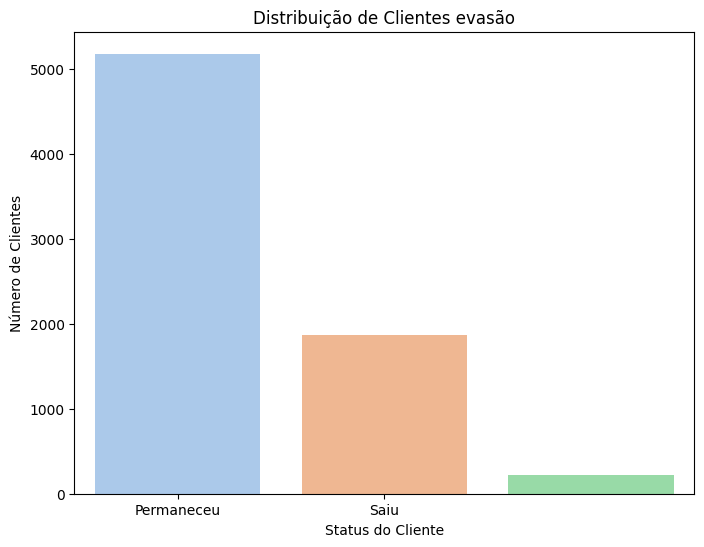

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se a coluna 'Churn' existe no DataFrame
if 'Churn' in df_cleaned.columns:
    # Contar os valores de churn
    churn_counts = df_cleaned['Churn'].value_counts()

    # Criar o gráfico de barras
    plt.figure(figsize=(8, 6))
    sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="pastel")
    plt.xlabel("Status do Cliente")
    plt.ylabel("Número de Clientes")
    plt.title("Distribuição de Clientes evasão")
    plt.xticks(ticks=[0, 1], labels=["Permaneceu", "Saiu"])
    plt.show()
else:
    print("Erro: A coluna 'Churn' não foi encontrada no DataFrame.")


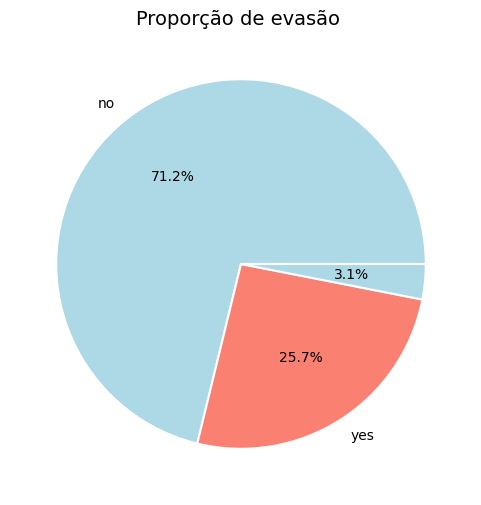

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se a coluna 'Churn' existe no DataFrame
if 'Churn' in df_cleaned.columns:
    # Contar os valores de churn
    churn_counts = df_cleaned['Churn'].value_counts()

   # Gráfico de pizza para proporção de churn com melhorias
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,  # Utilizando os índices gerados pelo value_counts()
    autopct='%1.1f%%',
    colors=["lightblue", "salmon"],
    wedgeprops={"edgecolor": "white", "linewidth": 1.5}
)
plt.title("Proporção de evasão ", fontsize=14)
plt.show()



In [ ]:
import pandas as pd
import requests

# Carregar os dados do JSON
url = "https://raw.githubusercontent.com/jlima2020/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

# Converter para DataFrame
df = pd.DataFrame(data)

# Verificar as colunas disponíveis
print("Colunas disponíveis:", df.columns.tolist())

# Inspecionar os valores únicos das variáveis categóricas
for feature in ['Genero', 'TipoContrato', 'MetodoPagamento']:
    if feature in df.columns:
        print(f"Valores únicos em '{feature}':", df[feature].unique())




Colunas disponíveis: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [ ]:
# Criar TotalGasto se houver faturamento mensal e meses ativos
if 'FaturamentoMensal' in df.columns and 'MesesAtivos' in df.columns:
    df['TotalGasto'] = df['FaturamentoMensal'] * df['MesesAtivos']
    print("Coluna 'TotalGasto' criada com sucesso!")

# Criar TempoContrato baseado na data de registro
if 'DataRegistro' in df.columns:
    df['DataRegistro'] = pd.to_datetime(df['DataRegistro'], errors='coerce')
    df['TempoContrato'] = (pd.Timestamp.today() - df['DataRegistro']).dt.days / 30  # Convertendo para meses
    print("Coluna 'TempoContrato' criada com sucesso!")


In [ ]:
for feature in ['phone', 'internet', 'account', 'Churn']:
    if feature in df.columns:
        df[feature] = df[feature].astype(str)  # Convertendo para string antes de categoria
        df[feature] = df[feature].astype('category')  # Definindo como categoria


In [ ]:
import pandas as pd

# Expandindo a coluna 'customer' para separar os atributos dentro do dicionário
df['Genero'] = df['customer'].apply(lambda x: x['gender'] if isinstance(x, dict) else None)

# Verificar se a nova coluna foi adicionada corretamente
print("Valores únicos em 'Genero':", df['Genero'].unique())


Valores únicos em 'Genero': ['Female' 'Male']


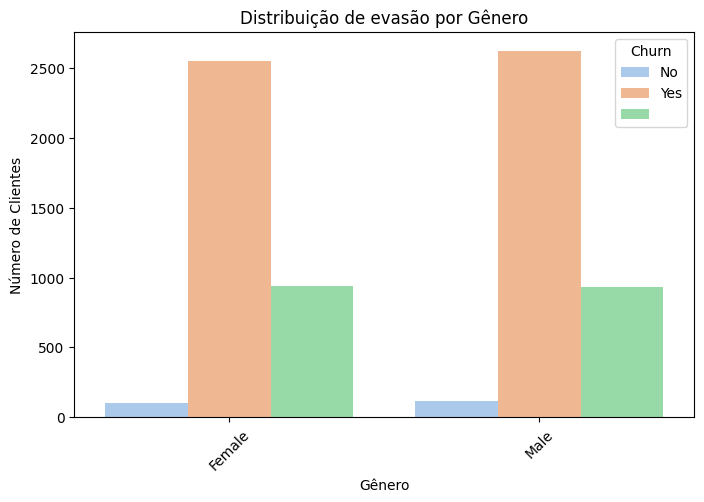

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Genero', hue='Churn', palette='pastel')
plt.xlabel("Gênero")
plt.ylabel("Número de Clientes")
plt.title("Distribuição de evasão por Gênero")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=df['Churn'].unique())
plt.show()


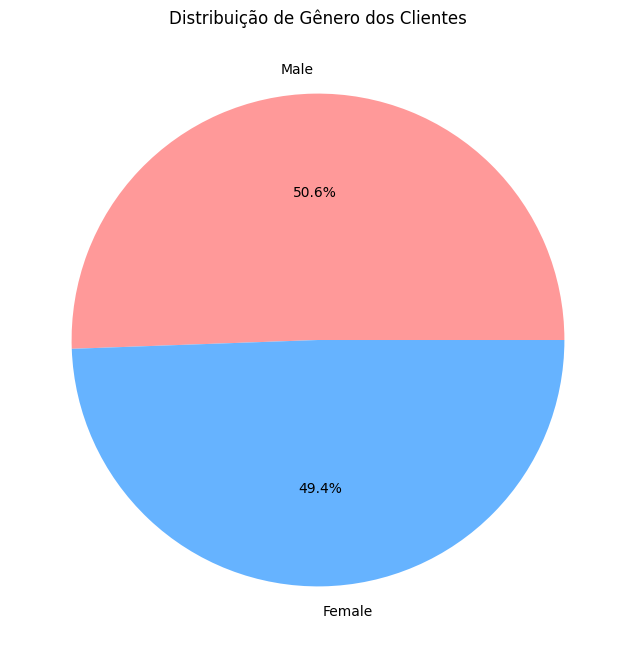

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informação de 'gender' dentro da coluna 'customer'
df["Gender"] = df["customer"].apply(lambda x: x.get("gender") if isinstance(x, dict) else None)

# Contar ocorrências de cada gênero
gender_counts = df["Gender"].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff"])
plt.title("Distribuição de Gênero dos Clientes")
plt.show()



In [ ]:
print(df['phone'].head())

0     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
1    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}
2     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
3     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
4     {'PhoneService': 'Yes', 'MultipleLines': 'No'}
Name: phone, dtype: category
Categories (3, object): ['{'PhoneService': 'No', 'MultipleLines': 'No p..., '{'PhoneService': 'Yes', 'MultipleLines': 'No'}',
                         '{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}']


In [ ]:
import pandas as pd

# Extrair 'PhoneService' da coluna 'phone'
df['PhoneService'] = df['phone'].apply(lambda x: eval(x)['PhoneService'] if isinstance(x, str) else x.get('PhoneService'))

# Verificar os valores únicos
print("Valores únicos em 'PhoneService':", df['PhoneService'].unique())



Valores únicos em 'PhoneService': ['Yes' 'No']


In [ ]:
import ast

df['PhoneService'] = df['phone'].apply(lambda x: ast.literal_eval(x)['PhoneService'] if isinstance(x, str) else x.get('PhoneService'))


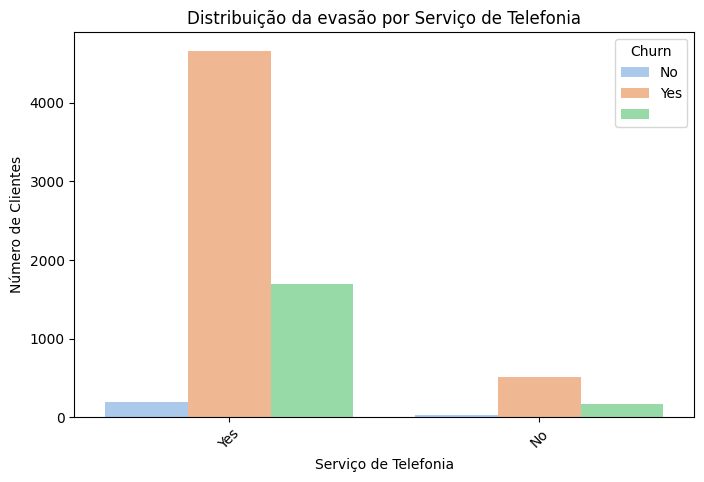

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PhoneService', hue='Churn', palette='pastel')
plt.xlabel("Serviço de Telefonia")
plt.ylabel("Número de Clientes")
plt.title("Distribuição da evasão por Serviço de Telefonia")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=df['Churn'].unique())
plt.show()


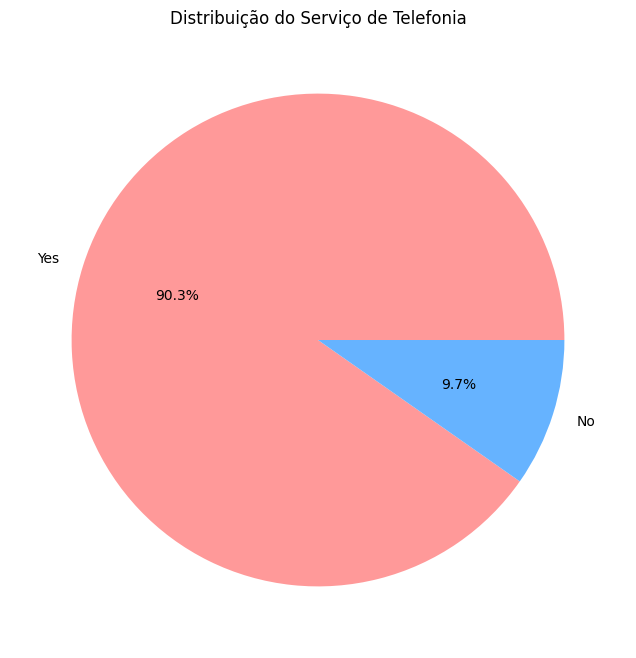

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informação de 'PhoneService' dentro da coluna 'phone'
df["PhoneService"] = df["phone"].apply(lambda x: x.get("PhoneService") if isinstance(x, dict) else None)

# Contar ocorrências de cada tipo de serviço de telefonia
phone_counts = df["PhoneService"].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(phone_counts, labels=phone_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff"])
plt.title("Distribuição do Serviço de Telefonia")
plt.show()


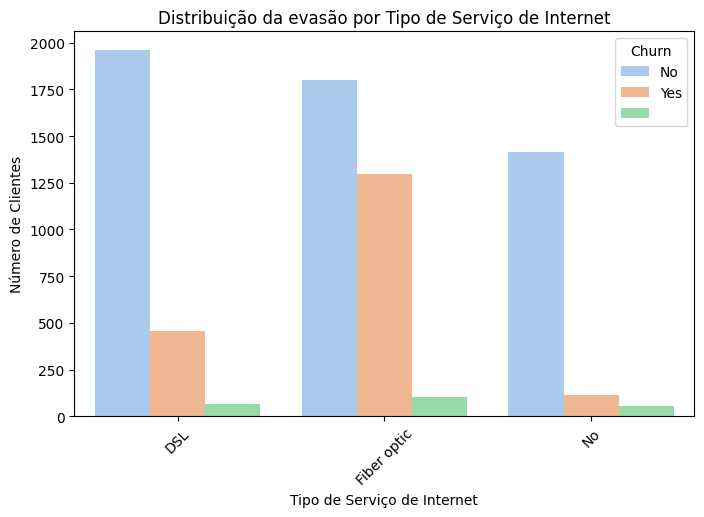

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informação de 'InternetService' dentro da coluna 'internet'
df["InternetService"] = df["internet"].apply(lambda x: x.get("InternetService") if isinstance(x, dict) else None)

# Criar gráfico de contagem para InternetService
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="InternetService", hue="Churn", palette="pastel")
plt.xlabel("Tipo de Serviço de Internet")
plt.ylabel("Número de Clientes")
plt.title("Distribuição da evasão por Tipo de Serviço de Internet")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=df["Churn"].unique())
plt.show()



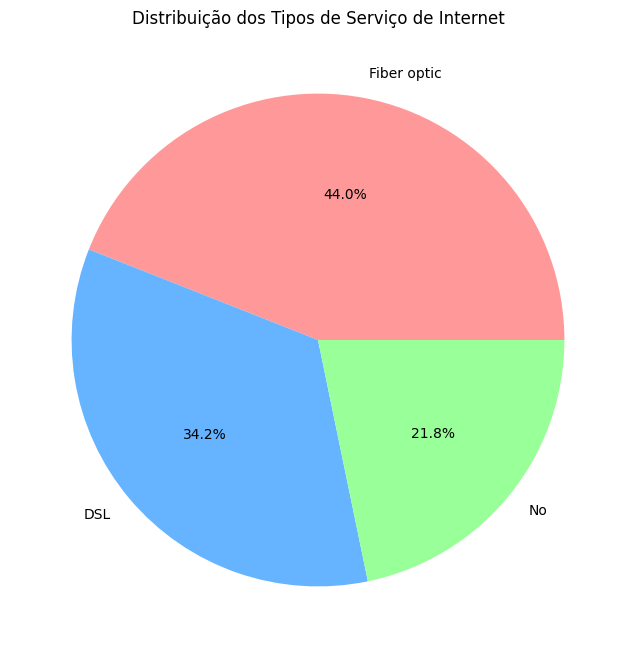

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informação de 'InternetService' dentro da coluna 'internet'
df["InternetService"] = df["internet"].apply(lambda x: x.get("InternetService") if isinstance(x, dict) else None)

# Contar ocorrências de cada tipo de serviço de internet
internet_counts = df["InternetService"].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(internet_counts, labels=internet_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Distribuição dos Tipos de Serviço de Internet")
plt.show()


In [ ]:
print("Colunas disponíveis:", df.columns.tolist())


Colunas disponíveis: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account', 'Genero', 'PhoneService']


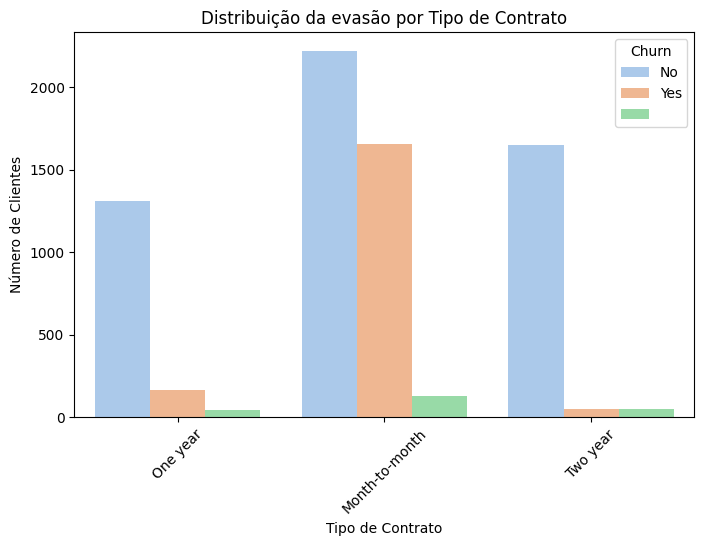

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informação de 'Contract' dentro da coluna 'account'
df["Contract"] = df["account"].apply(lambda x: x.get("Contract") if isinstance(x, dict) else None)

# Criar gráfico de contagem para contrato
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Contract", hue="Churn", palette="pastel")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Número de Clientes")
plt.title("Distribuição da evasão por Tipo de Contrato")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=df["Churn"].unique())
plt.show()


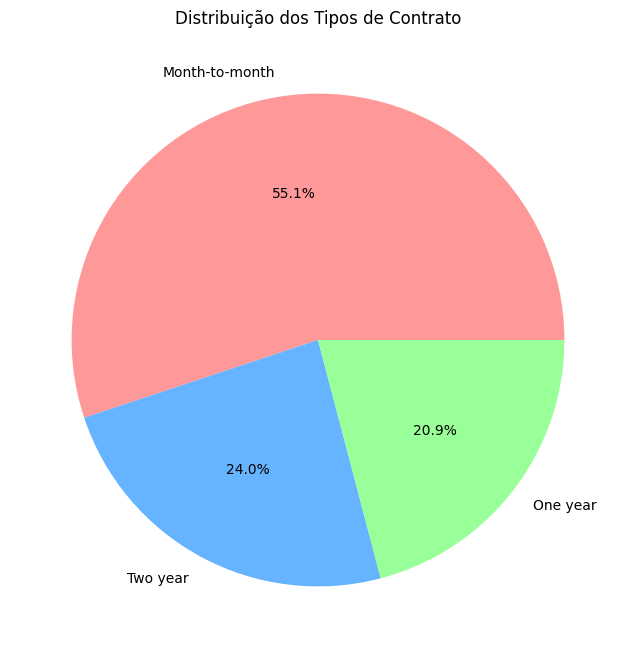

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

# Extrair a informação de 'Contract' dentro da coluna 'account'
df["Contract"] = df["account"].apply(lambda x: x.get("Contract") if isinstance(x, dict) else None)

# Contar ocorrências de cada tipo de contrato
contract_counts = df["Contract"].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contract_counts, labels=contract_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Distribuição dos Tipos de Contrato")
plt.show()



# 📄 Relatório Final

## 📌 Introdução

Este relatório apresenta uma análise detalhada sobre a **evasão de clientes**, explorando os principais fatores que influenciam na retenção e no desligamento de usuários. Utilizamos técnicas de **ETL (Extração, Transformação e Carga)** para preparar os dados e gerar insights para a tomada de decisão.

---

## 🔍 Análise Exploratória dos Dados

Antes de apresentar os gráficos, verificamos a qualidade dos dados e identificamos possíveis padrões de evasão.

Que tinha uma base de dados de 5000 clientes com tempo acaba se perdendo uma média de 2000 com relação de 25% entre o total.

A relação de clientes homem e mulheres é a quase a mesma sendo 50% para o sexo masculino de consumidores do Telecom de categoria de Internet, celular, DSL e
entre outros, o sexo feminino está entre 49,4% assim tem uma fatia bem separada entre eles.

Tem evasão grande em relação a serviço de telefonia fixo 4000 clientes com representação no gráfico de Pizza de 90% contra 9,7% que apenas uma porção de
1000 consumidores que tem este serviço contratado.

Com a Internet tem uma média de 2000 clientes com contração do DSL e 1750 a internet de fibra óptica, com evasão de 500 consumidores que sairam deste serviço e relação da fibra óptica 1250.

Da para análisa que os clientes preferem o serviço de internet de DSL em relação a fibra óptica com a relação gráfica do pizza temos uma proporção de 44% para 34,2%

na questão dos contratos de 1, 2 e 3 anos podemos fazer análise que maior quebra contratoal ocorreu no 2 ano de uma média 1500 clientes que forma para outra telecom os outros anos teve uma efetividade maior para assim não peder uma quantidade boa de consumidores.

Conclusão

Portanto uma iniciativa para não ter uma evasão relacionado no segmento de Internet, serviço de telefone e proteção de segurança IP privado em relação a internet é fazer um serviço de qualidade e dar uma promoção para algumas assinaturas para assim ter uma atratividade valor para marca também poder mudar o modo como está a venda.

Para assim ter um pós-venda adequado com está análise de dados que pode mudar o modo ao direitores podem ver a entrega de valor de seu serviço para os gerentes e outros colaboradores para sua forma como trabalha.

